
# Clustering Jerárquico, Densidad y Mean-Shift


In [1]:
import matplotlib.pyplot as plt 
%matplotlib inline
import pandas as pd
import numpy as np
from skimage import io
from IPython import display

## En este cuaderno vamos a necesitar dibujar un dendograma

Disponible en el "__03.0ClusteringUtilidades.ipynb__"

In [2]:
run 03.0_ClusteringUtilidades.ipynb

load done!


## Descripción general del método de agrupación jerárquica

- A diferencia de __K-means__, son métodos __deterministas__.
- Parten de una matriz $D = (d_{ij})$ de __distancias__ o $S = (s_{ij})$ de __similitudes__, matrices $N \times N$ entre los $N$ elementos del conjunto de instancias.
- Si todas las variables son __continuas__, la distancia más utilizada es la euclídea (con variables estandarizadas univariantemente en caso de ser conveniente).
- Si hay variables __continuas__ y __categóricas__ no suele ser aceptable trabajar con distancias y se usan __similitudes__.

El algoritmo tiene los siguientes pasos:

- Comenzamos con __N grupos__ (uno para cada instancia) y la matriz _D_ o _S_.
- Buscamos los elementos más __próximos__ (mínimo valor $d_{ij}$ o $s_{ij}$) y los unimos en un grupo.
- Recalculamos la matriz de distancias (o similitudes) definiendo una __distancia o similitud entre este nuevo grupo__ y el resto.
- Repetimos los dos pasos anteriores hasta que todas las observaciones estén unidas en un solo grupo

La forma de calcular la distancia entre grupos de puntos puede hacerse de diferentes formas como:
- Por __encadenamiento simple__ tomando como distancia de 2 grupos la de los 2 puntos más próximos. Tiende a __encadenar individuos sueltos__ y no grupos.
- Por __encadenamiento completo__ tomando como distancia de 2 grupos la de los 2 puntos más alejados. Es menos sensible a __atípicos__.
- Método de __Ward__ que __maximiza la homogeneidad__ intra-grupo. Como medida de homogeneidad se usa la __suma de cuadrados__ de los errores. Tiende a formar grupos esféricos aunque los grupos no lo sean.

Una forma de visualizar la estructura del grupo gerárquico es con el __dendograma__.

<img src="images/clusterJerarq.png" width="500px">

### Ejemplo simple de una agrupación jerárquica

Un ejemplo simple del __proceso de agrupación jerárquica__ donde se utiliza la __distancia euclídea__ para calcular la matriz de distancias se muestra a continuación.

En cada paso se forma un nuevo grupo que implica el __recálculo de las coordenadas de su centroide (en verde)__.


<img src="images/Proceso_Jerarquico.png" width="700px">

### Dendograma con el resultado del ejemplo

Se muestran las posibles soluciones en función del nivel de agrupación


<img src="images/Dendograma.png" width="700px">

### Caso de uso de la similitud

En el caso de usar una similitud el algoritmo sería igual pero sustituyendo la matriz de distancia por una de similitud. La diagonal principal serían _unos_ y el cálculo de las similitudes entre dos elementos sería como se indica en el ejemplo que aparece a continuación.


## Cluster jerárquico sobre el conjunto Iris

In [3]:
from sklearn.datasets import load_iris
import pandas as pd
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target']=iris['target']
df.head()
X = df.values[:,0:4]
y = df.values[:,4]

Se resuelve un cluster aglomerativo con __scikit-learn__ que es __AgglomerativeClustering__, cuyos parámetros más importantes son:

- __n_clusters__ (int o None, default=2). El número de clústeres a buscar. Debe ser None si distance_threshold no es None.
- __affinity__ (str o función llamable, default=’euclidean’). Métrica utilizada. Puede ser "euclidian", "l1", "l2", "manhattan", "cosine" o "precomputed". Si la linkage es “ward”, solo se acepta “euclidean”. Si es "precomputed", se necesita una matriz de distancia (en lugar de una matriz de similitud) como entrada para el método de ajuste.
- __compute_full_tree__ (‘auto’ or bool, default=’auto’). Para la ejecución hasta construir n_clusters.
- __linkage__ (‘ward’, ‘complete’, ‘average’, ‘single’, default=’ward’). 
- __distance_threshold__ (float, default=None), es el umbral de distancia de vinculación por encima del cual los clústeres no se fusionarán. Si no es None, n_clusters debe ser None y compute_full_tree debe ser True.
- __compute_distances__ (bool, default=False). Calcula las distancias entre los clústeres incluso si no se utiliza la distancia umbral (distance_threshold). Sirve para hacer la visualización de dendrogramas, pero introduce una sobrecarga computacional y de memoria. (Nuevo en versión 0.24)

__Según los valores de linkage__:
- 'ward' __minimiza la varianza__ de los grupos que se fusionan. En cada etapa, se unen los dos clusters para los cuales se tenga el menor incremento en el valor total de la suma de la varianza en cada cluster. La varianza de un cluster es la suma de las distancias al cuadrado entre cada punto y su centroide: $\sum_{i=1}^n |x_{i} - \overline{x}|^2$.

- ‘average’ usa el __promedio de las distancias__ de cada observación de los dos conjuntos.
- 'complete' utiliza __las distancias máximas__ entre todas las observaciones de los dos conjuntos.
- 'single' utiliza el __mínimo de las distancias__ entre todas las observaciones de los dos conjuntos.

In [4]:
from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='complete')
y_ag = ac.fit_predict(X)
etiquetas=np.unique(y_ag) 

In [5]:
y_ag

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 0,
       2, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 0, 0,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [6]:
y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.])

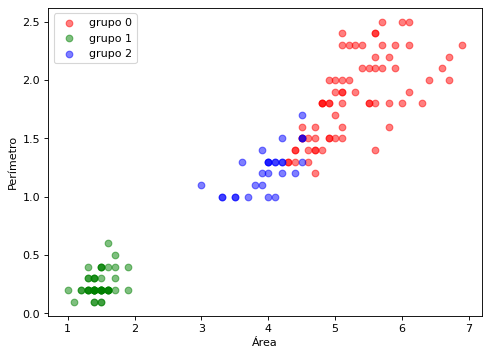

In [20]:
import matplotlib.pyplot as plt
names = ['grupo 0', 'grupo 1', 'grupo 2']
marcas = ['*', 'o', 's']
color = ['red', 'green', 'blue']
plt.figure(figsize=(7, 5), dpi=80)
for i in range(len(names)):
    cl = i
    plt.scatter(X[y_ag==cl,2], X[y_ag==cl,3], c=color[i], alpha=0.5, marker='o', label=names[i])
plt.xlabel("Área")
plt.ylabel("Perímetro")
plt.legend(loc='upper left')
plt.show()

### Es posible visualizar el dendograma con la siguiente ejecución

- Para que se pueda dibujar el dendograma es necesario que <b>AgglomerativeClustering</b> construya la variable <b>distances_</b>. Hay que dar una combinación de parámetros que lo permita.

Las variables que maneja el cluster jerarquico y que intervienen en la construcción del dendograma tienen la siguiente estructura:
- <b>distances_</b> : Es una lista con las distancias a las que se han ido efectuando las uniones por orden de aparición en el dendograma. Ocurren de menor distancia a mayor distancia. En el dendograma la escala de las distancias aparece en el eje vertical. 
- <b>children_</b> : Es una lista con los pares de elementos que se funden en cada nodo del dendograma. Por cada item de distancia aparece un item con el nodo. El número de filas del conjunto X se corresponde con el nº de elementos de devuelve fit_predict y que se vuelcan en __etiquetas__, supongamos __N__. Cuando en el nodo se unen dos elementos individuales en  <b>children_</b> aparecen dos números entre __0 y N-1__, pero si unen nodos de agrupaciones anteriores a aperecen valores __N o mayor que N__. 

In [21]:
cluster_dist = AgglomerativeClustering(distance_threshold=None, n_clusters=3, compute_distances=True)
cluster_dist.fit(X)

AgglomerativeClustering(compute_distances=True, n_clusters=3)

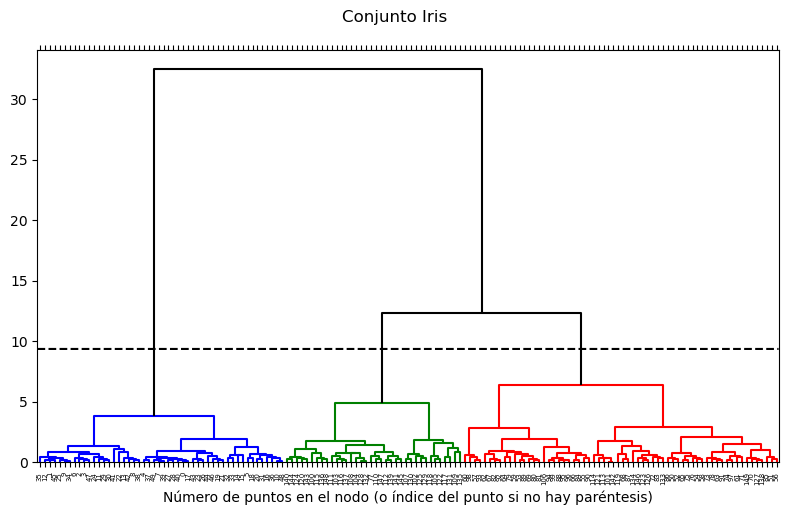

In [22]:
titulo="Conjunto Iris"
subtitulo="Número de puntos en el nodo (o índice del punto si no hay paréntesis)"
figSize=(8,5)
#plot_dendrogram(cluster_dist, titulo, subtitulo, figSize, truncate_mode='level', p=4)
plot_dendrogram(cluster_dist, titulo, subtitulo, figSize)

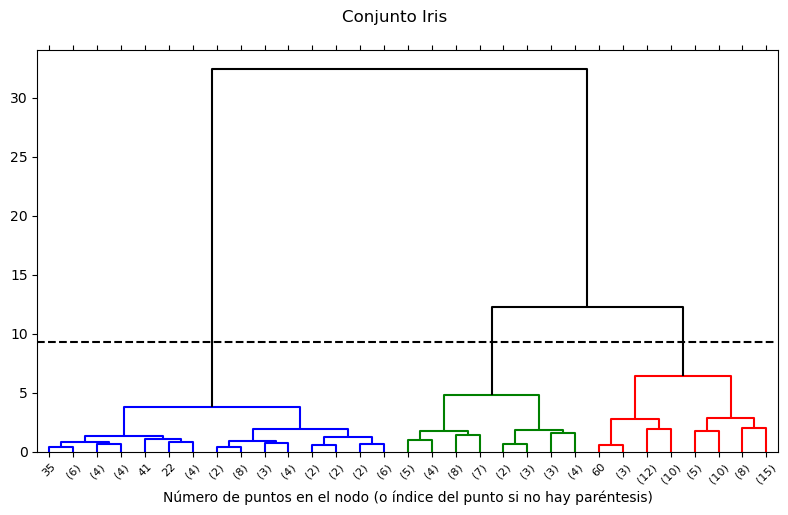

In [24]:
plot_dendrogram(cluster_dist, titulo, subtitulo, figSize, truncate_mode='level', p=4)

__El encadenamiento simple__: tiende a __encadenar individuos sueltos__ y no grupos.

<img src="images/jerarquico_single.png" width="500px">

__El encadenamiento completo__: es menos sensible a __atípicos__.

<img src="images/jerarquico_complete.png" width="500px">

__Ward__ tiende a __formar grupos esféricos__ aunque los grupos no lo sean

<img src="images/jerarquico_ward.png" width="500px">

## Clustering por densidad. DBSCAN

Un cuarto modo de clustering, también determinístico, es el __Density-Based Spatial Clustering of Applications with Noise (DBSCAN)__. Agrupa áreas de alta densidad quitando los puntos atípicos o outliers. Cada grupo se forma por la unión de puntos centrales R-vecinos junto con sus puntos frontera. Los puntos outliers se descartan. La densidad se basa en R, el radio de vecindad y M, mínimo número de vecinos para definir un cluster. Un punto se denomina central si dentro de su R-vecindad hay al menos M puntos. Un punto se denomina frontera si está en la R-vecindad de un central, pero no tiene M R-vecinos. Un punto atípico o outlier es aquel que ni es central, ni frontera. 

<img src="images/dbscan.png" width="400px">

In [25]:
from sklearn.cluster import DBSCAN 
db = DBSCAN(eps=0.5, min_samples=10, metric='euclidean')
#db = DBSCAN(eps=1, min_samples=40, metric='euclidean')
y_db = db.fit_predict(X)
np.unique(y_db)

array([-1,  0,  1], dtype=int64)

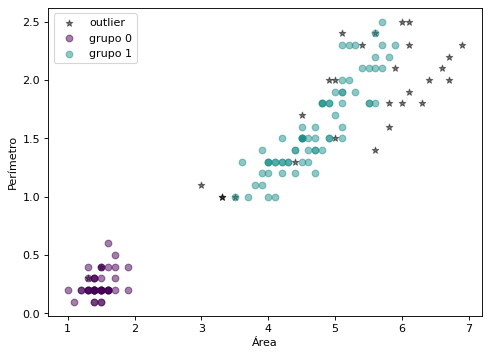

In [55]:
import matplotlib.pyplot as plt
viridis = mpl.colormaps['viridis'].resampled(len(np.unique(y_db)))
plt.figure(figsize=(7, 5), dpi=80)
for i in np.unique(y_db):
    cl = i
    etiqueta="grupo " + str(i)
    if cl==-1:
        plt.scatter(X[y_db==cl,2], X[y_db==cl,3], c="k", alpha=0.5, marker='*', label="outlier")
    else:
        plt.scatter(X[y_db==cl,2], X[y_db==cl,3], color=viridis(i), alpha=0.5, marker='o', label=etiqueta)
plt.xlabel("Área")
plt.ylabel("Perímetro")
plt.legend(loc='upper left')
plt.show()

## Clustering Mean-Shift

La agrupación __Mean Shift__ es un algoritmo basado en __ventanas deslizantes__ que intenta encontrar áreas densas de puntos de datos. Es un algoritmo basado en el centroide, lo que significa que el objetivo es localizar los puntos centrales de cada clúster, lo que funciona actualizando a los candidatos para que los puntos centrales sean la media de los puntos dentro de la ventana deslizante.

Estas ventanas candidatas son filtradas en una etapa de post procesamiento para eliminar los duplicados cercanos, formando el conjunto final de puntos centrales y sus correspondientes grupos.

1. Para explicar el agrupamiento Mean Shift se considera un conjunto de datos en un espacio bidimensional. Comenzamos con una ventana circular deslizante centrada en el punto __C__, seleccionada aleatoriamente, y con el radio __r__ como núcleo. Mean Shift implica el desplazamiento iterativo de este núcleo a una región de mayor densidad en cada paso hasta la convergencia.

2. En cada iteración, la ventana deslizante se desplaza hacia regiones de mayor densidad desplazando el centro de la circunferencia hacia el centroide de los puntos contenidos en la ventana. Gradualmente se moverá hacia áreas de mayor densidad de puntos.

<img src="images/meanShift.png" width="450px">

3. El desplazamiento de la ventana deslizante sigue de acuerdo a los promedios obtenidos hasta que no hay dirección en la que un desplazamiento pueda acomodar más puntos dentro del núcleo.

4. Este proceso de los pasos 1 al 3 se realiza con muchas ventanas hasta que todos los puntos se encuentran dentro de una ventana. Cuando se superponen varias ventanas, se conserva la ventana que contiene la mayor cantidad de puntos. A continuación, los puntos de datos se agrupan según la ventana deslizante en la que residen.

A diferencia de la agrupación K Means, __no es necesario seleccionar el número de clústeres__, ya que el desplazamiento medio lo descubre automáticamente. Es una gran ventaja. El hecho de que los __clustering converjan hacia los puntos de máxima densidad también es muy deseable__, ya que es bastante intuitivo de entender y encaja bien en un sentido naturalmente basado en datos. El inconveniente es que __la selección del tamaño/radio “r” de la ventana puede ser no trivial__.

La libreria dispone de la función __estimate_bandwidth__ para ayudar a estimar el ancho de ventana. Hay 2 parámetros fundamentales:
- __quantile__ : Debe estar entre [0, 1] 0.5 significa que se utiliza la mediana de todas las distancias por pares. Por defecto adopta el valor 0.3.
- __n_samples__ : El número de muestras a utilizar. Si no se proporciona, se utilizan todas las muestras.

In [56]:
from sklearn.cluster import MeanShift, estimate_bandwidth

In [57]:
from sklearn.decomposition import PCA
X = df.values[:,0:4]
y = df.values[:,4]
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

In [58]:
# The following bandwidth can be automatically detected using
bandwidth = estimate_bandwidth(X_pca, quantile=0.2, n_samples=None)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_pca)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("Número de grupos estimados : %d" % n_clusters_)

Número de grupos estimados : 3


### Se dibuja el resultado

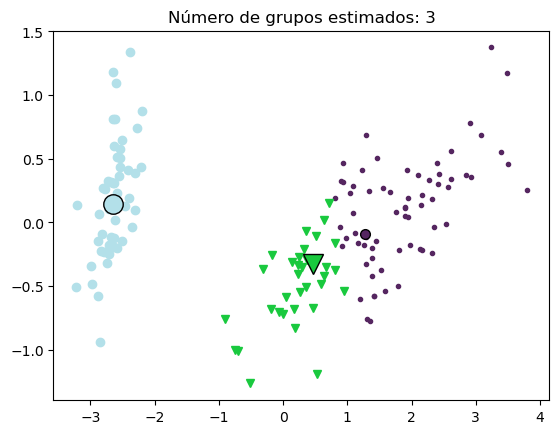

In [60]:
import matplotlib.pyplot as plt
import matplotlib.markers as mrk 

plt.figure(1)
plt.clf()

import random
colors=["#"+''.join([random.choice('0123456789ABCDEF') for i in range(6)])
       for j in range(n_clusters_)]
markers = mrk.MarkerStyle(marker='.', fillstyle=u'full').filled_markers

for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(X_pca[my_members, 0], X_pca[my_members, 1], markers[k], color=col)
    plt.plot(
        cluster_center[0],
        cluster_center[1],
        markers[k],
        markerfacecolor=col,
        markeredgecolor="k",
        markersize=14,
    )
plt.title("Número de grupos estimados: %d" % n_clusters_)
plt.show()